MSc Thesis Topic: **Real Time Uncertainty Estimation for detecting anomalies in Industrial control system.**

Author : Ayyoub Soullami

Supervisor : Ermiyas Ph.D.

>  This study explores the use of real-time uncertainty estimation techniques to enhance the detection of anomalies within these systems.







# **1.   Setup**



In [ ]:
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 82.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninst

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Dropout, BatchNormalization, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score,accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer,r2_score
from sklearn.metrics import mean_squared_error
from keras.models import clone_model
from tensorflow.keras.models import Model
from sklearn.model_selection import GridSearchCV
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Sequential

# Setting visualization style
sns.set_style('whitegrid')


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/




# **2.   Data Loading**



In [ ]:
df_1 = '/content/drive/My Drive/hai-22.04/train1.csv'
df_2 = '/content/drive/My Drive/hai-22.04/test1.csv'
df_3 = '/content/drive/My Drive/hai-22.04/train2.csv'
df_4 = '/content/drive/My Drive/hai-22.04/test2.csv'
df_5 = '/content/drive/My Drive/hai-22.04/train3.csv'
df_6 = '/content/drive/My Drive/hai-22.04/test3.csv'
df_7 = '/content/drive/My Drive/hai-22.04/train4.csv'
df_8 = '/content/drive/My Drive/hai-22.04/test4.csv'
df_9 = '/content/drive/My Drive/hai-22.04/train5.csv'
df_10 = '/content/drive/My Drive/hai-22.04/train6.csv'


In [ ]:
df1 = pd.read_csv(df_1)
df2 = pd.read_csv(df_2)
df3 = pd.read_csv(df_3)
df4 = pd.read_csv(df_4)
df5 = pd.read_csv(df_5)
df6 = pd.read_csv(df_6)
df7 = pd.read_csv(df_7)
df8 = pd.read_csv(df_8)
df9 = pd.read_csv(df_9)
df10 = pd.read_csv(df_10)

In [ ]:
# combine both datasets
ds = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8,df9,df10]) #

In [ ]:
# Converting the Timestamp to a datetime and set it as an index
ds['timestamp'] = pd.to_datetime(ds['timestamp'])
ds= ds.set_index('timestamp')

In [ ]:
# display first 5 rows of the dataset

ds.head(3)

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-11 10:00:00,0.08771,0.88504,476.76703,1014.79321,26.92264,15.07713,595.06104,30.08042,15.50464,12.01019,...,7.08818,276.40338,-0.00087,14742,276.45758,267.90363,8.90254,9914,27170,0
2021-07-11 10:00:01,0.08771,0.88619,476.76703,1014.79321,26.92264,14.97197,531.50317,30.08423,16.20023,12.56714,...,7.08818,276.18634,0.00058,14781,278.91705,268.95258,8.90254,9914,27171,0
2021-07-11 10:00:02,0.08771,0.88836,476.76703,1014.79321,26.92264,14.90129,451.06253,30.09148,16.53352,14.48975,...,7.08818,279.85754,-0.00072,14831,278.89899,269.76636,8.90254,9914,27170,0


> The dataset consists of several features, most of which appear to be numerical, representing various measurements and states from the water treatment process.

**Features:**

> Timestamp: The date and time when the measurements were taken.
FIT101, LIT101, ... FIT601: Various sensor readings, related to flow rates (FIT), level indicators (LIT), and other process measurements. The prefixes (e.g., FIT, LIT, AIT, PIT) suggest different types of sensors or measurements, while the numbers indicate specific points or sensors within the system.
MV101, P101, P102, ... P603: These appear to be state indicators for various equipment pieces (e.g., motor valves (MV), pumps (P)). The values are binary (e.g., 1 for on/running, 2 or 0 for off/stopped).

**Target Variable:**

> Normal/Attack: This column indicates whether the measurements at a given timestamp are from a normal operation period or during an attack (cyber-physical or otherwise). This is a categorical variable with at least two categories: Normal and Attack.





# **3. Data Preprocessing and Cleaning**




In [ ]:
# Check for missing values in the dataset
missing_values = ds.isnull().sum()

# Count the number of missing values in each column
missing_values_count = missing_values[missing_values > 0]

print(missing_values_count)

Series([], dtype: int64)


> The dataset does not contain any missing values, so we don't need to handle missing data through imputation or dropping rows/columns.


In [ ]:
attack_values = ds['Attack'].unique()

attack_values

array([0, 1])

> For the sake of simplicity, we will rename the 'Attack' column to  'label'

In [ ]:
ds.rename(columns={'Attack': 'label'}, inplace=True)

In [ ]:
ds.head(1)
ds.shape

(1365602, 87)

In [ ]:
ds.drop_duplicates(inplace=True)

In [ ]:
ds.shape

(1365602, 87)

>Identifying and removing constant features is an important step in data preprocessing, as these features provide no variability and therefore no useful information to a model. A constant feature is one that has the same value across all observations in the dataset.

In [ ]:
# Identify constant features based on standard deviation
constant_features_std = [col for col in ds.columns if ds[col].std() == 0]

print("Constant features based on standard deviation:", constant_features_std)

Constant features based on standard deviation: ['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04']


In [ ]:
# Remove constant features from the DataFrame
ds = ds.drop(columns=constant_features_std)

In [ ]:
# Using list comprehensions to classify numerical and categorical features
numerical_features = [column for column in ds.columns if ds[column].nunique() > 10]
categorical_features = [column for column in ds.columns if ds[column].nunique() <= 10]
print(len(numerical_features), 'Numerical Features :', numerical_features, len(categorical_features), 'Categorical Features :', categorical_features)

61 Numerical Features : ['P1_B2004', 'P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FCV03Z', 'P1_FT01', 'P1_FT01Z', 'P1_FT02', 'P1_FT02Z', 'P1_FT03', 'P1_FT03Z', 'P1_LCV01D', 'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01D', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z', 'P1_PIT01', 'P1_PIT02', 'P1_PP04', 'P1_PP04SP', 'P1_TIT01', 'P1_TIT02', 'P1_TIT03', 'P2_24Vdc', 'P2_AutoSD', 'P2_ManualSD', 'P2_SCO', 'P2_SCST', 'P2_SIT01', 'P2_VIBTR01', 'P2_VIBTR02', 'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P3_FIT01', 'P3_LCP01D', 'P3_LCV01D', 'P3_LIT01', 'P3_PIT01', 'P4_HT_FD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD', 'P4_ST_FD', 'P4_ST_GOV', 'P4_ST_LD', 'P4_ST_PO', 'P4_ST_PS', 'P4_ST_PT01', 'P4_ST_TT01'] 10 Categorical Features : ['P2_ATSW_Lamp', 'P2_AutoGO', 'P2_Emerg', 'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_OnOff', 'P3_LH01', 'P3_LL01', 'label']


In [ ]:

# Display unique values in each column
for column in categorical_features:
    unique_values = ds[column].unique()
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print("\n")

Unique Values in 'P2_ATSW_Lamp' Column:
[1 0]


Unique Values in 'P2_AutoGO' Column:
[1 0]


Unique Values in 'P2_Emerg' Column:
[0 1]


Unique Values in 'P2_MASW' Column:
[0 1]


Unique Values in 'P2_MASW_Lamp' Column:
[0 1]


Unique Values in 'P2_ManualGO' Column:
[0 1]


Unique Values in 'P2_OnOff' Column:
[1 0]


Unique Values in 'P3_LH01' Column:
[70 80]


Unique Values in 'P3_LL01' Column:
[25 20]


Unique Values in 'label' Column:
[0 1]




In [ ]:
# List of categorical features you are interested in
cols = ['P3_LH01', 'P3_LL01']

# Display unique values and their counts in each column
for column in cols:
    # Get the counts of unique values
    value_counts = ds[column].value_counts()
    print(f"Counts of Unique Values in '{column}' Column:")
    print(value_counts)
    print("\n")


Counts of Unique Values in 'P3_LH01' Column:
P3_LH01
70    915601
80    450001
Name: count, dtype: int64


Counts of Unique Values in 'P3_LL01' Column:
P3_LL01
25    915601
20    450001
Name: count, dtype: int64




In [ ]:
# based on the value count in the previous cell
# I will replace 70 and 25 by 1
# I will replace 80 and 20 by 0
# after performing downsampling, I can map them to their original values.
ds['P3_LH01'] = ds['P3_LH01'].replace({70: 1, 80: 0})
ds['P3_LL01'] = ds['P3_LL01'].replace({25: 1, 20: 0})

In [ ]:
# check the unique values of each categorical column again
# Display unique values in each column
for column in categorical_features:
    unique_values = ds[column].unique()
    print(f"Unique Values in '{column}' Column:")
    print(unique_values)
    print("\n")

Unique Values in 'P2_ATSW_Lamp' Column:
[1 0]


Unique Values in 'P2_AutoGO' Column:
[1 0]


Unique Values in 'P2_Emerg' Column:
[0 1]


Unique Values in 'P2_MASW' Column:
[0 1]


Unique Values in 'P2_MASW_Lamp' Column:
[0 1]


Unique Values in 'P2_ManualGO' Column:
[0 1]


Unique Values in 'P2_OnOff' Column:
[1 0]


Unique Values in 'P3_LH01' Column:
[1 0]


Unique Values in 'P3_LL01' Column:
[1 0]


Unique Values in 'label' Column:
[0 1]




# **Apply SMOTE-NC**


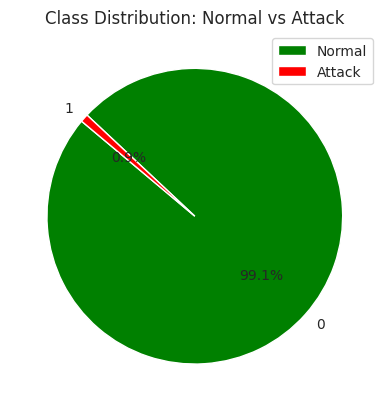

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = ds['label'].value_counts()

# Plotting the class distribution as a pie chart
fig, ax = plt.subplots()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.ylabel('')  # Hide the y-label as it's not needed in pie charts

# Replace the numerical labels with the actual class names
class_labels = ['Normal' if x == 0 else 'Attack' for x in class_distribution.index]

plt.legend(labels=class_labels)

plt.show()

In [ ]:
target = ds['label']
target = target.reset_index(drop=True)

ds = ds.drop('label', axis=1)

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTENC

In [ ]:
# Item to be dropped
item_to_drop = 'label'

# Creating a new list without the item to drop
categorical_features = [item for item in categorical_features if item != item_to_drop]

print(categorical_features)


['P2_ATSW_Lamp', 'P2_AutoGO', 'P2_Emerg', 'P2_MASW', 'P2_MASW_Lamp', 'P2_ManualGO', 'P2_OnOff', 'P3_LH01', 'P3_LL01']


In [ ]:
# Convert column names to indices
categorical_features_indices = [ds.columns.get_loc(name) for name in categorical_features]

# Use the indices for SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

# Fit and resample the dataset
X_resampled, y_resampled = smote_nc.fit_resample(ds, target)

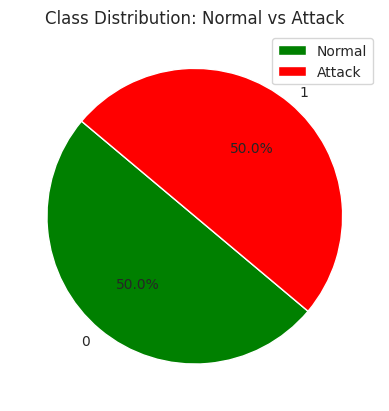

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = y_resampled.value_counts()

# Plotting the class distribution as a pie chart
fig, ax = plt.subplots()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.ylabel('')  # Hide the y-label as it's not needed in pie charts

# Replace the numerical labels with the actual class names
class_labels = ['Normal' if x == 0 else 'Attack' for x in class_distribution.index]

plt.legend(labels=class_labels)

plt.show()

In [ ]:
X_resampled.shape

(2707144, 70)

## **Normalization**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

num_features = X_resampled[numerical_features]
cat_features = X_resampled[categorical_features]

# Min-Max scaling for numerical features
scaler = MinMaxScaler()
numerical_data_scaled = scaler.fit_transform(num_features)
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=num_features.columns)

# Since categorical features are already binary, just ensure they are in the correct format
cat_features_df = pd.DataFrame(cat_features, columns=categorical_features)

# Concatenate numerical and categorical dataframes
preprocessed_ds = pd.concat([numerical_data_scaled_df, cat_features_df], axis=1)

print(preprocessed_ds)


         P1_B2004  P1_B2016  P1_B3004  P1_B3005  P1_B4002  P1_B4005  P1_B400B  \
0        0.226130  0.132221  0.798452  0.538147  0.209725  0.150771  0.184712   
1        0.226130  0.133566  0.798452  0.538147  0.209725  0.149720  0.164743   
2        0.226130  0.136102  0.798452  0.538147  0.209725  0.149013  0.139470   
3        0.226130  0.140521  0.798452  0.538147  0.209725  0.148225  0.124805   
4        0.226130  0.140252  0.798452  0.538147  0.209725  0.147309  0.117941   
...           ...       ...       ...       ...       ...       ...       ...   
2707139  0.326171  0.562886  0.195798  0.410605  0.307856  0.233775  0.251716   
2707140  0.227650  0.372230  0.260043  0.354807  0.060821  0.224595  0.184135   
2707141  0.371563  0.336439  0.582156  0.499615  0.060821  0.071119  0.076941   
2707142  0.102874  0.574060  0.918745  0.388647  0.033609  0.119405  0.089686   
2707143  0.102874  0.396059  0.244530  0.278263  0.033609  0.000000  0.003599   

         P1_B4022  P1_FCV01

In [ ]:
preprocessed_ds.info()
preprocessed_ds.tail(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707144 entries, 0 to 2707143
Data columns (total 70 columns):
 #   Column        Dtype  
---  ------        -----  
 0   P1_B2004      float64
 1   P1_B2016      float64
 2   P1_B3004      float64
 3   P1_B3005      float64
 4   P1_B4002      float64
 5   P1_B4005      float64
 6   P1_B400B      float64
 7   P1_B4022      float64
 8   P1_FCV01D     float64
 9   P1_FCV01Z     float64
 10  P1_FCV02D     float64
 11  P1_FCV02Z     float64
 12  P1_FCV03D     float64
 13  P1_FCV03Z     float64
 14  P1_FT01       float64
 15  P1_FT01Z      float64
 16  P1_FT02       float64
 17  P1_FT02Z      float64
 18  P1_FT03       float64
 19  P1_FT03Z      float64
 20  P1_LCV01D     float64
 21  P1_LCV01Z     float64
 22  P1_LIT01      float64
 23  P1_PCV01D     float64
 24  P1_PCV01Z     float64
 25  P1_PCV02D     float64
 26  P1_PCV02Z     float64
 27  P1_PIT01      float64
 28  P1_PIT02      float64
 29  P1_PP04       float64
 30  P1_PP04SP     floa

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_ST_TT01,P2_ATSW_Lamp,P2_AutoGO,P2_Emerg,P2_MASW,P2_MASW_Lamp,P2_ManualGO,P2_OnOff,P3_LH01,P3_LL01
2707044,0.371563,0.218386,0.384100,0.557932,0.060821,0.000000,0.018532,0.087079,0.054225,0.055918,...,0.335756,1,1,0,0,0,0,1,1,1
2707045,0.964903,0.599158,0.915455,0.362970,0.033609,0.111152,0.072247,0.145054,0.099730,0.085235,...,0.123547,1,1,0,0,0,0,1,1,1
2707046,0.362512,0.278223,0.784720,0.445210,0.033609,0.000000,0.004070,0.081946,0.000000,0.000379,...,0.280523,1,1,0,0,0,0,1,1,1
2707047,0.132149,0.353715,0.526680,0.352941,0.054132,0.077721,0.080346,0.132139,0.134360,0.130429,...,0.321221,1,1,0,0,0,0,1,1,1
2707048,0.227650,0.395065,0.260043,0.354807,0.060821,0.217750,0.245781,0.145003,0.140982,0.137277,...,0.286337,1,1,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2707139,0.326171,0.562886,0.195798,0.410605,0.307856,0.233775,0.251716,0.395675,0.135392,0.149293,...,0.539244,1,1,0,0,0,0,1,1,1
2707140,0.227650,0.372230,0.260043,0.354807,0.060821,0.224595,0.184135,0.138423,0.150283,0.173151,...,0.267442,1,1,0,0,0,0,1,1,1
2707141,0.371563,0.336439,0.582156,0.499615,0.060821,0.071119,0.076941,0.121095,0.133130,0.131417,...,0.274709,1,1,0,0,0,0,1,1,1
2707142,0.102874,0.574060,0.918745,0.388647,0.033609,0.119405,0.089686,0.179846,0.153243,0.150224,...,0.297965,1,1,0,0,0,0,1,1,1


# **4.   Exploratory Data Analysis (EDA)**

In [ ]:
summary_statistics = preprocessed_ds.describe()
print(summary_statistics)

           P1_B2004      P1_B2016      P1_B3004      P1_B3005      P1_B4002  \
count  2.707144e+06  2.707144e+06  2.707144e+06  2.707144e+06  2.707144e+06   
mean   5.257174e-01  4.136616e-01  5.611747e-01  4.664510e-01  2.659293e-01   
std    2.971918e-01  1.339536e-01  2.688656e-01  1.466023e-01  3.346058e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.135968e-01  3.291796e-01  3.074189e-01  3.597861e-01  3.360929e-02   
50%    5.013818e-01  4.070792e-01  5.683679e-01  4.273054e-01  6.082118e-02   
75%    7.555617e-01  4.914690e-01  8.220111e-01  5.816185e-01  3.359326e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

           P1_B4005      P1_B400B      P1_B4022     P1_FCV01D     P1_FCV01Z  \
count  2.707144e+06  2.707144e+06  2.707144e+06  2.707144e+06  2.707144e+06   
mean   3.290063e-01  3.261331e-01  3.078005e-01  3.061785e-01  2.994641e-01   
std    4.041831e-01  4.023325e-01  2.799939e-01  3.

**4.1.   Distribution of the class label**


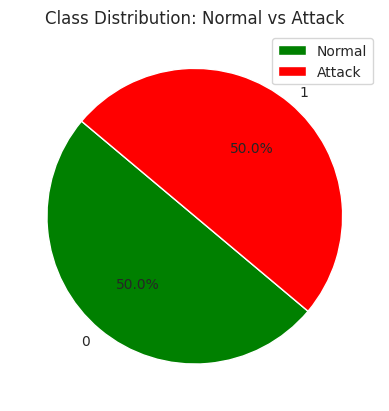

In [ ]:
# Count the number of occurrences of each class in the target series
class_distribution = y_resampled.value_counts()

# Plotting the class distribution as a pie chart
fig, ax = plt.subplots()
class_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['green', 'red'], ax=ax)

plt.title('Class Distribution: Normal vs Attack')
plt.ylabel('')  # Hide the y-label as it's not needed in pie charts

# Replace the numerical labels with the actual class names
class_labels = ['Normal' if x == 0 else 'Attack' for x in class_distribution.index]

plt.legend(labels=class_labels)

plt.show()




### 4.2 Correlation Analysis


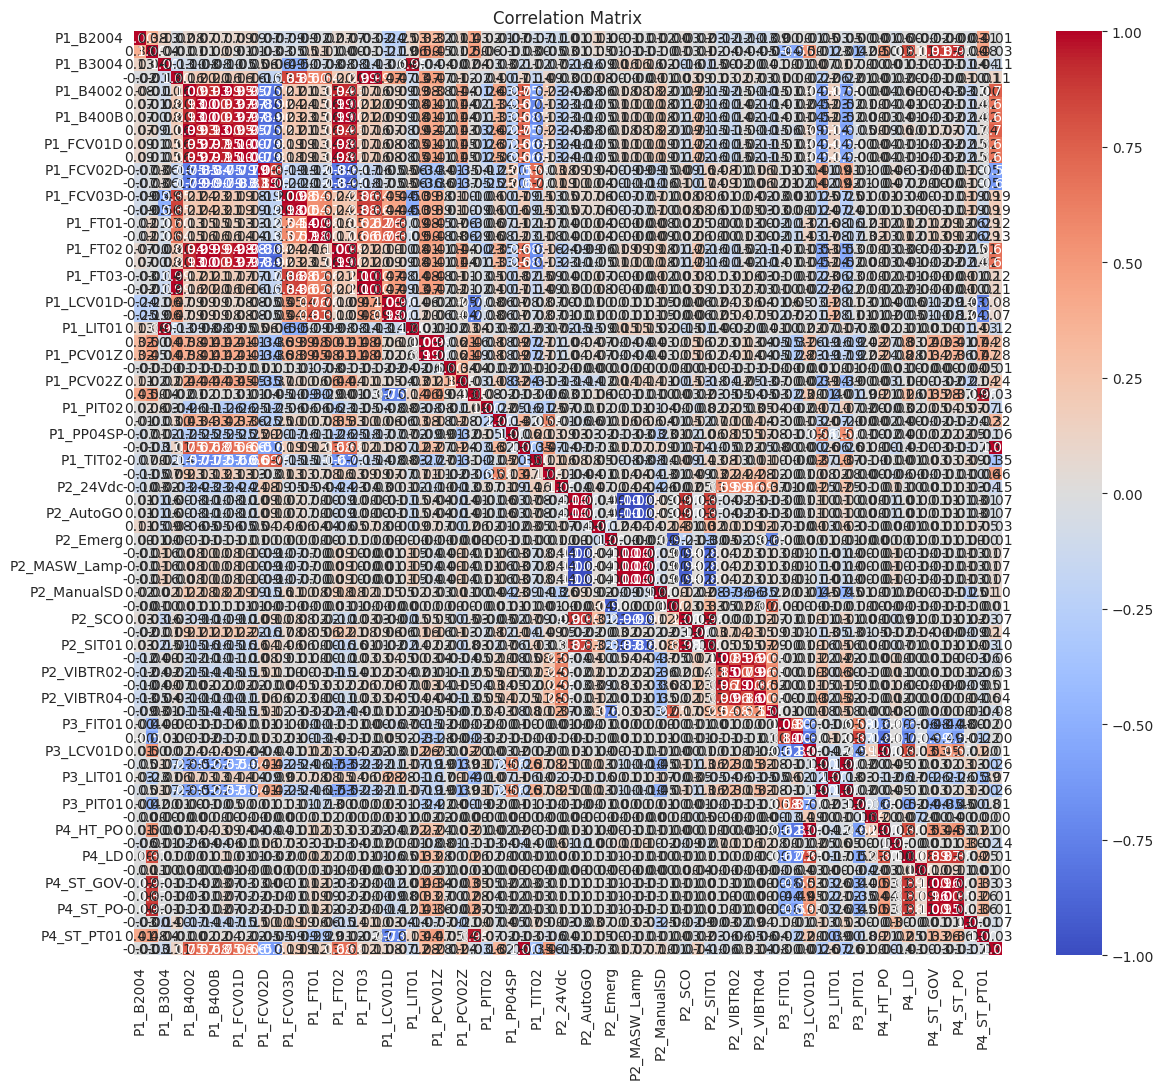

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(ds.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 5. Model building

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(preprocessed_ds, y_resampled, test_size=0.2, random_state=42)
X_train = X_train[y_train == 0]
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (1082882, 70)
Test data shape: (541429, 70)


In [ ]:
from tensorflow.keras.optimizers import Adam

def build_autoencoder(input_dim, hidden_dim):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    hidden_layer = Dense(hidden_dim, activation='sigmoid')(input_layer)

    # Decoder
    output_layer = Dense(input_dim, activation='sigmoid')(hidden_layer)

    # Autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer=Adam(), loss='mean_squared_error')

    return autoencoder

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Build and train the autoencoder
input_dim = X_train.shape[1]
hidden_dim = 8  # As specified in the paper
autoencoder = build_autoencoder(input_dim, hidden_dim)
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_split=0.2, callbacks=[early_stopping])

# Save the model
#autoencoder.save('baseline_autoencoder.h5')

print("Model training completed and saved as 'baseline_autoencoder.h5'")


Epoch 1/50
3385/3385 [==============================] - 11s 3ms/step - loss: 0.0275 - val_loss: 0.0140
Epoch 2/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0107 - val_loss: 0.0088
Epoch 3/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0081 - val_loss: 0.0074
Epoch 4/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0071 - val_loss: 0.0069
Epoch 5/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0067 - val_loss: 0.0066
Epoch 6/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 7/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 8/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 9/50
3385/3385 [==============================] - 10s 3ms/step - loss: 0.0062 - val_loss: 0.0062
Epoch 10/50
3385/3385 [==============================] - 10s 3ms/step - l

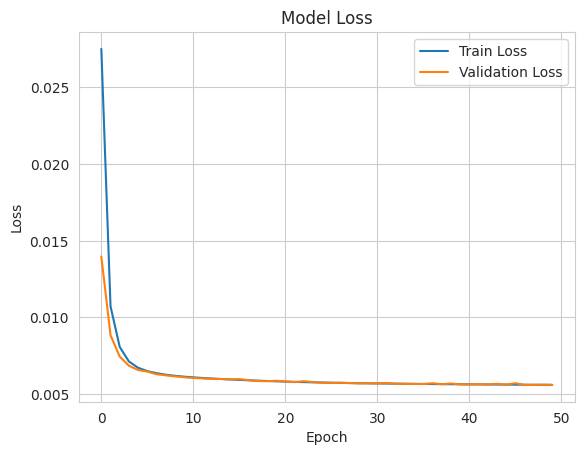

In [ ]:
# model 2
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [ ]:
X_test_predictions = autoencoder.predict(X_test)

mae = np.mean(np.abs(X_test_predictions - X_test), axis=1)
# Plot the histogram of RMSE loss

# Visual determination of threshold - assuming you've determined it to be at RMSE = 0.25
# threshold = np.percentile(mae, 85)

16920/16920 [==============================] - 28s 2ms/step


In [ ]:
threshold = 0.037372

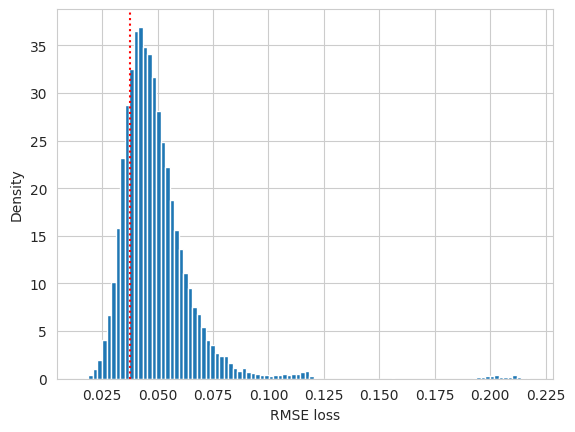

In [ ]:
plt.hist(mae, bins=100, density=True)
plt.xlabel('RMSE loss')
plt.ylabel('Density')


plt.axvline(x=threshold, color='r', linestyle='dotted')

plt.show()

y_pred = (mae > threshold).astype(int)

In [ ]:
# Calculate the F1 Score, Precision, and Recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

F1 Score: 0.6822343610142098
Precision: 0.55271828288105
Recall: 0.8910241967356014


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.28      0.40    270690
           1       0.55      0.89      0.68    270739

    accuracy                           0.58    541429
   macro avg       0.64      0.58      0.54    541429
weighted avg       0.64      0.58      0.54    541429



why this results ?

In [ ]:
thresholds = np.linspace(min(mae), max(mae), num=100)
precision_list, recall_list, f1_list = [], [], []

# Calculate precision, recall, and F1-score for each threshold
for threshold in thresholds:
    predicted_anomalies = (mae > threshold).astype(int)
    precision = precision_score(y_test, predicted_anomalies)
    recall = recall_score(y_test, predicted_anomalies)
    f1 = f1_score(y_test, predicted_anomalies)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create traces for Precision, Recall, and F1-score
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=thresholds,
    y=precision_list,
    mode='lines+markers',
    name='Precision',
    text=[f"Threshold: {x:.6f}, Precision: {y:.6f}" for x, y in zip(thresholds, precision_list)],
    hoverinfo='text',
    marker=dict(size=8)  # Increase marker size for easier hovering
))
fig.add_trace(go.Scatter(
    x=thresholds,
    y=recall_list,
    mode='lines+markers',
    name='Recall',
    text=[f"Threshold: {x:.6f}, Recall: {y:.6f}" for x, y in zip(thresholds, recall_list)],
    hoverinfo='text',
    marker=dict(size=8)
))
fig.add_trace(go.Scatter(
    x=thresholds,
    y=f1_list,
    mode='lines+markers',
    name='F1-score',
    text=[f"Threshold: {x:.6f}, F1-score: {y:.6f}" for x, y in zip(thresholds, f1_list)],
    hoverinfo='text',
    marker=dict(size=8)
))

# Set plot layout
fig.update_layout(
    title='Precision, Recall, and F1-score for Different Thresholds',
    xaxis_title='Threshold',
    yaxis_title='Score',
    legend_title='Metrics',
    hovermode='closest'
)

# Show the plot
fig.show()


In [ ]:
# **Save the model **

path = '/content/drive/My Drive/ey_models/'

# Save the model
autoencoder.save('/content/drive/My Drive/ey_models/model_autoencoder_HAI_baseline_final.h5')

# Save the model
autoencoder.save('/content/drive/My Drive/ey_models/model_autoencoder_HAI_baseline_final.keras')

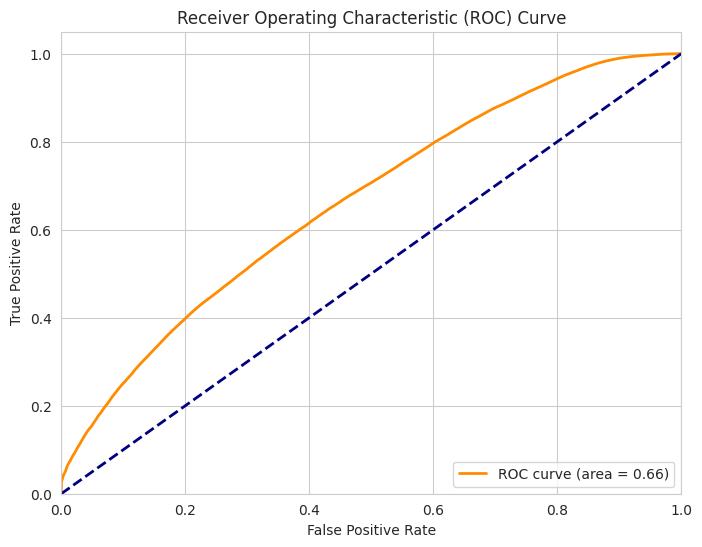

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, f1_score, precision_score, recall_score

#Calculate the FPR and TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, mae)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
roc_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
roc_data.to_csv('/content/drive/My Drive/ey_models/roc_curve_autoencoder_HAI_baseline_final.csv', index=False)


In [ ]:
roc_data.shape

(200696, 3)

In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/My Drive/ey_models/model_autoencoder_HAI_final.keras'
autoencoder_last_16 = load_model(model_path)